# Makemore
## A Character Level Language Model
#### Following Andrej Karpathy's Video: "The spelled-out intro to neural networks and backpropagation: building micrograd"

In [29]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
words = open("names.txt", 'r').read().splitlines()

In [31]:
N = torch.zeros((27,27))

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [32]:
bigram = {}

for w in words:
    letters = ['.'] + list(w) + ['.']
    for a,b in zip(letters, letters[1:]):
        idx1 = stoi[a]
        idx2 = stoi[b]
        N[idx1, idx2] += 1

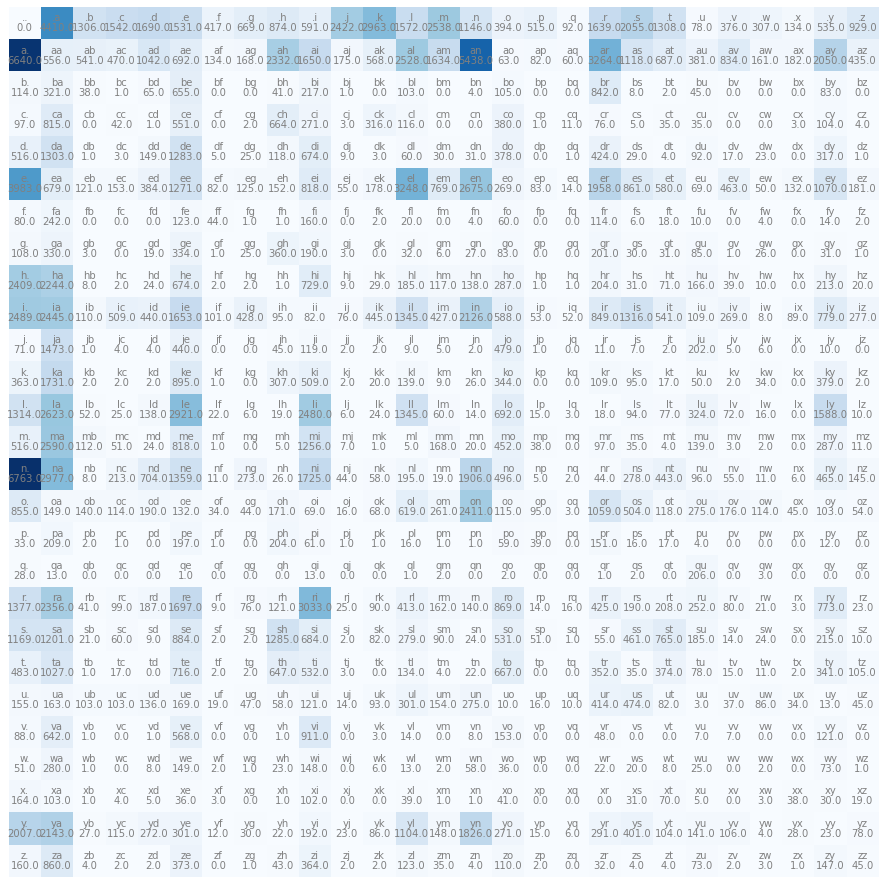

In [33]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [47]:
# Notice that the first row of N is the distribution over starting letters
p = N[0]/sum(N[0])
print(p) # the first element is 0 since we don't have empty names

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])


In [48]:
# creating a generator for a manual seed to have deterministic behaviour
SEED = 123456
g = torch.Generator().manual_seed(123456)

In [49]:
# torch.multinomial allows for us to sample from the distribution N[0]
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([ 1, 19, 10, 11, 12, 12, 10, 19,  1,  1, 22, 11,  1,  1,  2,  1, 16, 19,
         1, 14, 14,  5, 10,  1, 12, 10,  3, 10,  4, 14,  3,  7, 10,  5, 18, 11,
         1,  4,  1,  8, 20, 11, 11, 11, 12,  1, 23,  1, 10,  5,  4, 10, 19, 19,
        11, 11, 19, 14,  7, 19,  3, 12,  3, 10, 15, 13, 13, 19, 18,  2, 12, 19,
        11,  8, 19, 19, 13,  1, 20, 12, 11,  1,  1, 19, 11, 13,  8,  4, 11, 20,
        11, 18,  5, 19,  6,  3, 18, 19,  2, 12])

In [50]:
P = N.float()
P /= P.sum(1, keepdims=True)

In [52]:
NUM_SAMPLES = 10

for i in range(NUM_SAMPLES):
    out = []
    idx = 0
    
    while True:
        p = P[idx]
        idx = torch.multinomial(p, num_samples = 1, replacement=True, generator=g).item()
        out.append(itos[idx])
        
        if idx == 0:
            break
    print(''.join(out))

tokicanjahtambacowdaiqukkh.
kisod.
fagrigatima.
l.
de.
a.
aynn.
ta.
pruadhid.
zi.
